# HR EMPLOYEE ATTRITION - EDA

Data taken from : https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In this case study, a HR dataset was sourced from IBM HR Analytics Employee Attrition & Performance which contains employee data for 1,470 employees with various information about the employees. In this section we will try to find the pattern of the employee who're churned.

As stated on the IBM website "This is a fictional data set created by IBM data scientists". Its main purpose was to demonstrate the IBM Watson Analytics tool for employee attrition.

## FEATURE DESCRIPTION



- Age - Age of employee
- Attrition	- Attrition of employee (Yes, No)
- BusinessTravel - Frequency of business travel (Non-Travel, Travel_Rarely, Travel_Frequently)
- DailyRate - Amount of money a company has to pay employee to work for them for a day
- Department - Part of an company that deals with a particular area of work(Research & Development, Sales, Human Resources)
- DistanceFromHome - Distance between company and home
- Education -	Level of education (1: Below College, 2: College, 3: Bachelor, 4: Master, 5: Doctor)
- EducationField - Field of Education (Life Sciences, Medical, Human Resources, Technical Degree, Marketing, Other)
- EmployeeCount - Count of employee (always 1)
- EmployeeNumber - Number of employee
- EnvironmentSatisfaction - Satisfaction of environment (1: Low, 2: Medium, 3: High, 4: Very High)
- HourlyRate - Amount of money a company has to pay employee to work for them for an hour
- JobInvolvement - Level of job involvement (1: Low, 2: Medium, 3: High, 4: Very High)
- JobLevel - Level of job (1~5)
- JobRole - Role of job (Sales Executive, Research Scientist, Laboratory Technician, Manager, Healthcare Representative, Sales Representative, Manufacturing Director, Human Resources, Manager)
- JobSatisfaction - Satisfaction of job (1: Low, 2: Medium, 3: High, 4: Very High)
- MaritalStatus - Fact of employee being married or not (Married, Divorced, Single)
- MonthlyIncome	- Income of Month
- MonthlyRate - Amount of money a company has to pay employee to work for them for a month
- NumCompaniesWorked - Length of service
- Over18 - Over 18 years old (Y, N)
- OverTime - After the usual time needed or expected in a job (Yes, No)
- PercentSalaryHike - Percent of salary of hike
- PerformanceRating - Level of performance assessment (1: Low, 2: Good, 3: Excellent, 4: Outstanding)
- RelationshipSatisfaction - Level of relationship satisfaction (1: Low, 2: Medium, 3: High, 4: Very High)
- StandardHours - Standard work hours (always 80)
- StockOptionLevel - Stock option level (0~3)
- TotalWorkingYears - Years of total working
- TrainingTimesLastYear - Training times of last year
- WorkLifeBalance - Level of work life balance (1: Bad, 2: Good, 3: Better, 4: Best)
- YearsAtCompany - Years at company
- YearsInCurrentRole - Years in current role
- YearsSinceLastPromotion - Years since last promotion
- YearsWithCurrManager - Years with current manager

## IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
from scipy.stats import anderson, chi2_contingency

import warnings
warnings.filterwarnings('ignore')

## OVERVIEW

> In this part we will try to see the initial data and the overview of this data in general.

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

> The `info()` in this dataset above indicated that there are 1470 rows and 35 columns.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


> From `describe()` we can see the general information on this data. It contained information about mean, standard deviation, minimum values, maximum values as well as the quantiles. For example, on **Age** feature, we can see that it have mean of 36.9, and std of 9.13 (let's round it up, so we can infer it easily). We can say that the average age of employee on this dataset are on 37 years old with variety between 28 years old and 46 years old. Youngest employee is 18 years old, while the oldest is 60 years old. This applies to the other features categorized as the continous / numerical features on this data.

> But further examining the data, we can see that there are supposedly a **categorical data**, but since it was already being labeled, therefore python reads it as a continous data. I'll try to point this and maybe fix it on **preprocessing** part later.

> Moving on, below are the general information of the categorical features in this dataset. unique represent the different category, top represent the category that appeared more, and freq are the frequency of the said category. For example, **JobRole** feature, it's having 9 different categories, while the most are Sales Executive, appeared for 326 times.

In [7]:
df.describe(include = 'object').T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


> Now further examining the datatype, there are several features that need to be fixed on preprocessing part. With that in mind, I'll show the summary of this data below.

In [8]:
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Age,int64,0,43,[54]
1,Attrition,object,0,2,[No]
2,BusinessTravel,object,0,3,[Travel_Rarely]
3,DailyRate,int64,0,886,[913]
4,Department,object,0,3,[Research & Development]
5,DistanceFromHome,int64,0,29,[23]
6,Education,int64,0,5,[2]
7,EducationField,object,0,6,[Human Resources]
8,EmployeeCount,int64,0,1,[1]
9,EmployeeNumber,int64,0,1470,[1032]


## PREPROCESSING

> As mentioned, there are some datas that are need to be processed. Therefore in this part we will try to fix it one by one, starting from *Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, JobSatisfaction, TrainingTimesLastYear, PerformanceRating, RelationshipSatisfaction* lastly *WorkLifeBalance* features. I'll start this process by dropping the unnecessary columns, then grouping the data by it's datatype and then I'll further group the data that we want to process into a new dataframe for an easier view.

In [9]:
# drop unneccessary columns

df.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1, inplace = True)

In [10]:
df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [11]:
df_cat = df.select_dtypes('object')
df_con = df.select_dtypes('int64')

In [12]:
df_cat.head(3)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes


In [13]:
df_con.head(3)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0


> First step done. Now I'll group it again to point the data that we're going to process.

In [14]:
df_proc = df_con[['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 
                  'RelationshipSatisfaction', 'WorkLifeBalance', 'JobLevel']]

In [15]:
pd.DataFrame({'Features' : df_proc.columns, 'dataType' : df_proc.dtypes, 
              'nullvalues'  : df_proc.isna().sum(), 'unique' : [df[i].nunique() for i in df_proc.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df_proc.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Education,int64,0,5,[1]
1,EnvironmentSatisfaction,int64,0,4,[3]
2,JobInvolvement,int64,0,4,[1]
3,JobSatisfaction,int64,0,4,[2]
4,PerformanceRating,int64,0,2,[3]
5,RelationshipSatisfaction,int64,0,4,[1]
6,WorkLifeBalance,int64,0,4,[1]
7,JobLevel,int64,0,5,[5]


Next, I'll process the **Education**, **EnvironmentSatisfaction** and **JobInvolvement** feature. From dataset information, we can infer that :

> **Education** supposed to be categorized as : **1 - 'Below College', 2 - 'College', 3 - 'Bachelor', 4 - 'Master'**, and **5 - 'Doctor'**

> **EnvironmentSatisfaction** supposed to be categorized as : **1 - 'Low', 2 - 'Medium', 3 - 'High'**, and **4 - 'Very High'**. 

> **JobInvolvement** supposed to be categorized as : **1 - 'Low', 2 - 'Medium', 3 - 'High'**, and **4 - 'Very High'**

In [16]:
for i in df_proc[['Education', 'EnvironmentSatisfaction', 'JobInvolvement']]:
    if i == 'Education':
        df_proc[i] = df_proc[i].replace({1 : 'Below College', 2 : 'College', 3 : 'Bachelor', 4 : 'Master', 5 : 'Doctor'})
    else :
        df_proc[i] = df_proc[i].replace({1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'})

In [17]:
pd.DataFrame({'Features' : df_proc.columns, 'dataType' : df_proc.dtypes, 
              'nullvalues'  : df_proc.isna().sum(), 'unique' : [df_proc[i].nunique() for i in df_proc.columns],
              'uniqueSample' : [list(pd.Series(df_proc[i].unique()).sample(2)) for i in df_proc.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Education,object,0,5,"[Doctor, Bachelor]"
1,EnvironmentSatisfaction,object,0,4,"[Low, Very High]"
2,JobInvolvement,object,0,4,"[Very High, Medium]"
3,JobSatisfaction,int64,0,4,"[1, 4]"
4,PerformanceRating,int64,0,2,"[3, 4]"
5,RelationshipSatisfaction,int64,0,4,"[2, 3]"
6,WorkLifeBalance,int64,0,4,"[3, 1]"
7,JobLevel,int64,0,5,"[1, 2]"


> As shown above, we've succeded the first process. Now I'll process the **JobSatisfaction**, **PerformanceRating**, and **RelationshipSatisfaction** features. From dataset information, we can infer that :

> **JobSatisfaction** supposed to be categorized as : **1 - 'Low', 2 - 'Medium', 3 - 'High'**, and **4 - 'Very High'**

> **PerformanceRating** supposed to be categorized as : **1 - 'Low', 2 - 'Good', 3 - 'Excellent'**, and **4 - 'Outstanding'**

> **RelationshipSatisfaction** supposed to be categorized as : **1 - 'Low', 2 - 'Medium', 3 - 'High'**, and **4 - 'Very High'**

In [18]:
for i in df_proc[['JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction']]:
    if i == 'PerformanceRating':
        df_proc[i] = df_proc[i].replace({1 : 'Low', 2 : 'Good', 3 : 'Excellent', 4 : 'Outstanding'})
    elif i == 'WorkLifeBalance':
        df_proc[i] = df_proc[i].replace({1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'})
    else :
        df_proc[i] = df_proc[i].replace({1 : 'Low', 2 : 'Medium', 3 : 'High', 4 : 'Very High'})

In [19]:
pd.DataFrame({'Features' : df_proc.columns, 'dataType' : df_proc.dtypes, 
              'nullvalues'  : df_proc.isna().sum(), 'unique' : [df_proc[i].nunique() for i in df_proc.columns],
              'uniqueSample' : [list(pd.Series(df_proc[i].unique()).sample(2)) for i in df_proc.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Education,object,0,5,"[College, Bachelor]"
1,EnvironmentSatisfaction,object,0,4,"[Low, High]"
2,JobInvolvement,object,0,4,"[Very High, Medium]"
3,JobSatisfaction,object,0,4,"[Very High, Medium]"
4,PerformanceRating,object,0,2,"[Excellent, Outstanding]"
5,RelationshipSatisfaction,object,0,4,"[Very High, High]"
6,WorkLifeBalance,int64,0,4,"[4, 2]"
7,JobLevel,int64,0,5,"[2, 3]"


> As shown above, we've succeded the second process. Now I'll process the **WorkLifeBalance** and **JobLevel** features. From dataset information, we can infer that :

> **WorkLifeBalance** supposed to be categorized as : **1 - 'Bad', 2 - 'Good', 3 - 'Better'**, and **4 - 'Best'**

> **JobLevel** supposed to be categorized as : **1: 'staff', 2: 'officer', 3: 'Assistant Manager', 4: 'Manager'**, and **5: 'Senior Manager'**. 

In [20]:
for i in df_proc[['WorkLifeBalance', 'JobLevel']]:
    if i == 'WorkLifeBalance':
        df_proc[i] = df_proc[i].replace({1 : 'Bad', 2 : 'Good', 3 : 'Better', 4 : 'Best'})
    else:
        df_proc[i] = df_proc[i].replace({1 : 'Staff', 2 : 'Officer', 3 : 'Assistant Manager', 4 : 'Manager', 5 : 'Senior Manager'})

In [21]:
pd.DataFrame({'Features' : df_proc.columns, 'dataType' : df_proc.dtypes, 
              'nullvalues'  : df_proc.isna().sum(), 'unique' : [df_proc[i].nunique() for i in df_proc.columns],
              'uniqueSample' : [list(pd.Series(df_proc[i].unique()).sample(2)) for i in df_proc.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Education,object,0,5,"[Below College, College]"
1,EnvironmentSatisfaction,object,0,4,"[High, Low]"
2,JobInvolvement,object,0,4,"[Medium, Very High]"
3,JobSatisfaction,object,0,4,"[Low, Medium]"
4,PerformanceRating,object,0,2,"[Outstanding, Excellent]"
5,RelationshipSatisfaction,object,0,4,"[Low, Medium]"
6,WorkLifeBalance,object,0,4,"[Best, Bad]"
7,JobLevel,object,0,5,"[Manager, Staff]"


> Now that we've finished the process. Let's wrap it up with `pd.concat()` and start the EDA process.

In [22]:
# drop the columns on df_con that are within df_proc

df_con.drop(df_proc, axis = 1, inplace = True)

In [23]:
df_con.head().T

,0,1,2,3,4
Age,41,49,37,33,27
DailyRate,1102,279,1373,1392,591
DistanceFromHome,1,8,2,3,2
HourlyRate,94,61,92,56,40
MonthlyIncome,5993,5130,2090,2909,3468
MonthlyRate,19479,24907,2396,23159,16632
NumCompaniesWorked,8,1,6,1,9
PercentSalaryHike,11,23,15,11,12
StockOptionLevel,0,1,0,0,1
TotalWorkingYears,8,10,7,8,6


In [24]:
# concat the df_proc to df_cat

df_cat = pd.concat([df_cat, df_proc], axis = 1)

In [25]:
df_cat.head(3).T

,0,1,2
Attrition,Yes,No,Yes
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely
Department,Sales,Research & Development,Research & Development
EducationField,Life Sciences,Life Sciences,Other
Gender,Female,Male,Male
JobRole,Sales Executive,Research Scientist,Laboratory Technician
MaritalStatus,Single,Married,Single
OverTime,Yes,No,Yes
Education,College,Below College,College
EnvironmentSatisfaction,Medium,High,Very High


> Finally we concat all the dataframes.

In [26]:
# concat all the dataframe into new dataframe for EDA 

df = pd.concat([df_cat, df_con], axis = 1)

In [27]:
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,College,Medium,...,19479,8,11,0,8,0,6,4,0,5
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,Below College,High,...,24907,1,23,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,College,Very High,...,2396,6,15,0,7,3,0,0,0,0
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,Master,Very High,...,23159,1,11,0,8,3,8,7,3,0
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Below College,Low,...,16632,9,12,1,6,3,2,2,2,2


In [28]:
df.tail()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No,College,High,...,12290,4,17,1,17,3,5,2,0,3
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No,Below College,Very High,...,21457,4,15,1,9,5,7,7,1,7
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes,Bachelor,Medium,...,5174,1,20,1,6,0,6,2,0,3
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No,Bachelor,Very High,...,13243,2,14,0,17,3,9,6,0,8
1469,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Bachelor,Medium,...,10228,2,12,0,6,3,4,3,1,2


> Below are the summary of the cleaned datasets.

In [29]:
pd.DataFrame({'Features' : df.columns, 'dataType' : df.dtypes.values, 
              'nullvalues' : [df[i].isna().sum() for i in df.columns],
              'unique' : [df[i].nunique() for i in df.columns],
              'uniqueSample' : [list(pd.Series(df[i].unique()).sample()) for i in df.columns]}).reset_index(drop = True)

,Features,dataType,nullvalues,unique,uniqueSample
0,Attrition,object,0,2,[Yes]
1,BusinessTravel,object,0,3,[Travel_Frequently]
2,Department,object,0,3,[Research & Development]
3,EducationField,object,0,6,[Life Sciences]
4,Gender,object,0,2,[Female]
5,JobRole,object,0,9,[Sales Representative]
6,MaritalStatus,object,0,3,[Married]
7,OverTime,object,0,2,[No]
8,Education,object,0,5,[Below College]
9,EnvironmentSatisfaction,object,0,4,[Very High]


## EXPLORATORY DATA ANALYSIS

### TARGET FEATURE

> We start this process by analyzing the target feature first, **Attrition**. Then we explore the **continous features** and **categorical features** to the target.

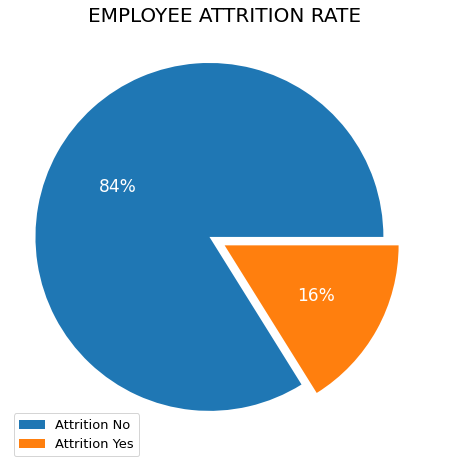

In [30]:
plt.figure(figsize = (12,8))
plt.title('EMPLOYEE ATTRITION RATE', fontsize = 20)

labels = 'Attrition No', 'Attrition Yes'

plt.pie(df['Attrition'].value_counts(), autopct = '%.0f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0))

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

> According to this article : https://smallbusiness.chron.com/healthy-employee-turnover-rate-12145.html 

> Turnover from employees leaving willingly averages 25 to 30 percent in the hospitality industry and runs about 9 percent in the banking and finance field, a rate that halved between 2013 and 2017. Then from above plot, we can see that there are 16% of employee that are left the company (Attrition Yes).  Mind you that this is *a fictionus data* and we don't know the industry fields. But if it were a true case, we can infer that this is still a good rate based on that article. Although from above plot we can also see that there are imbalance in this data.


### CONTINOUS FEATURES

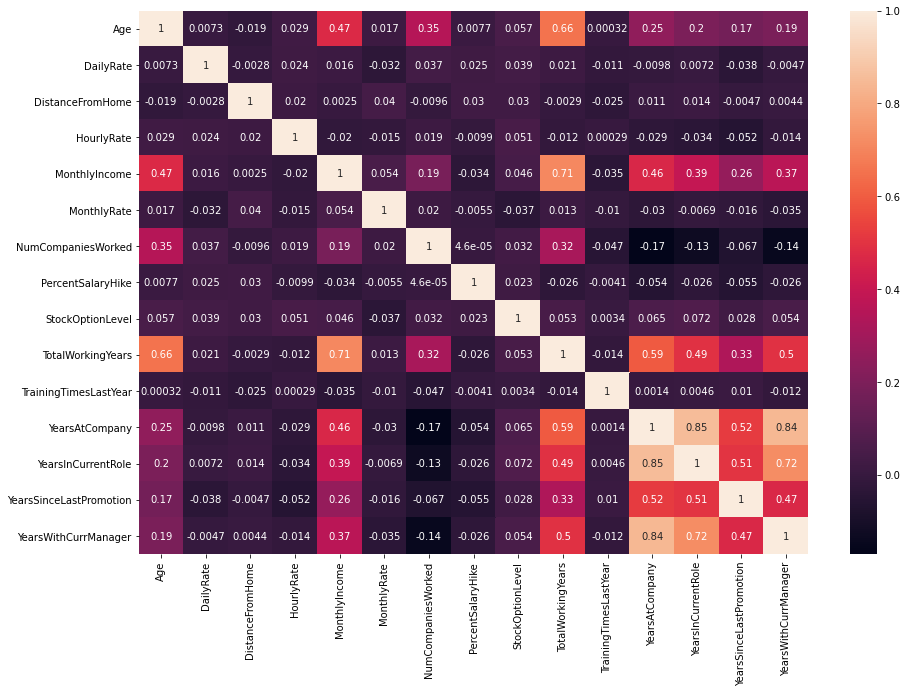

In [31]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr('spearman'), annot = True)
plt.show()

> The above plot may just be plain confusing, but I'll locate the rather significantly correlated features into heatmap below, and show the relationship.

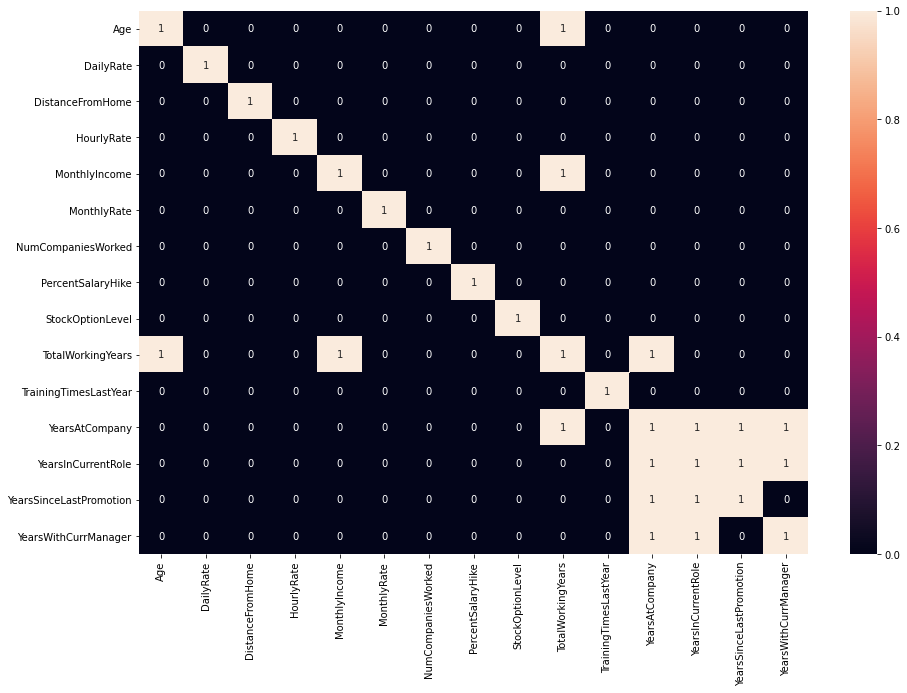

In [32]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr('spearman')>0.5, annot = True)
plt.show()

> Now I'll show the relationship with `pairplot()` one by one.

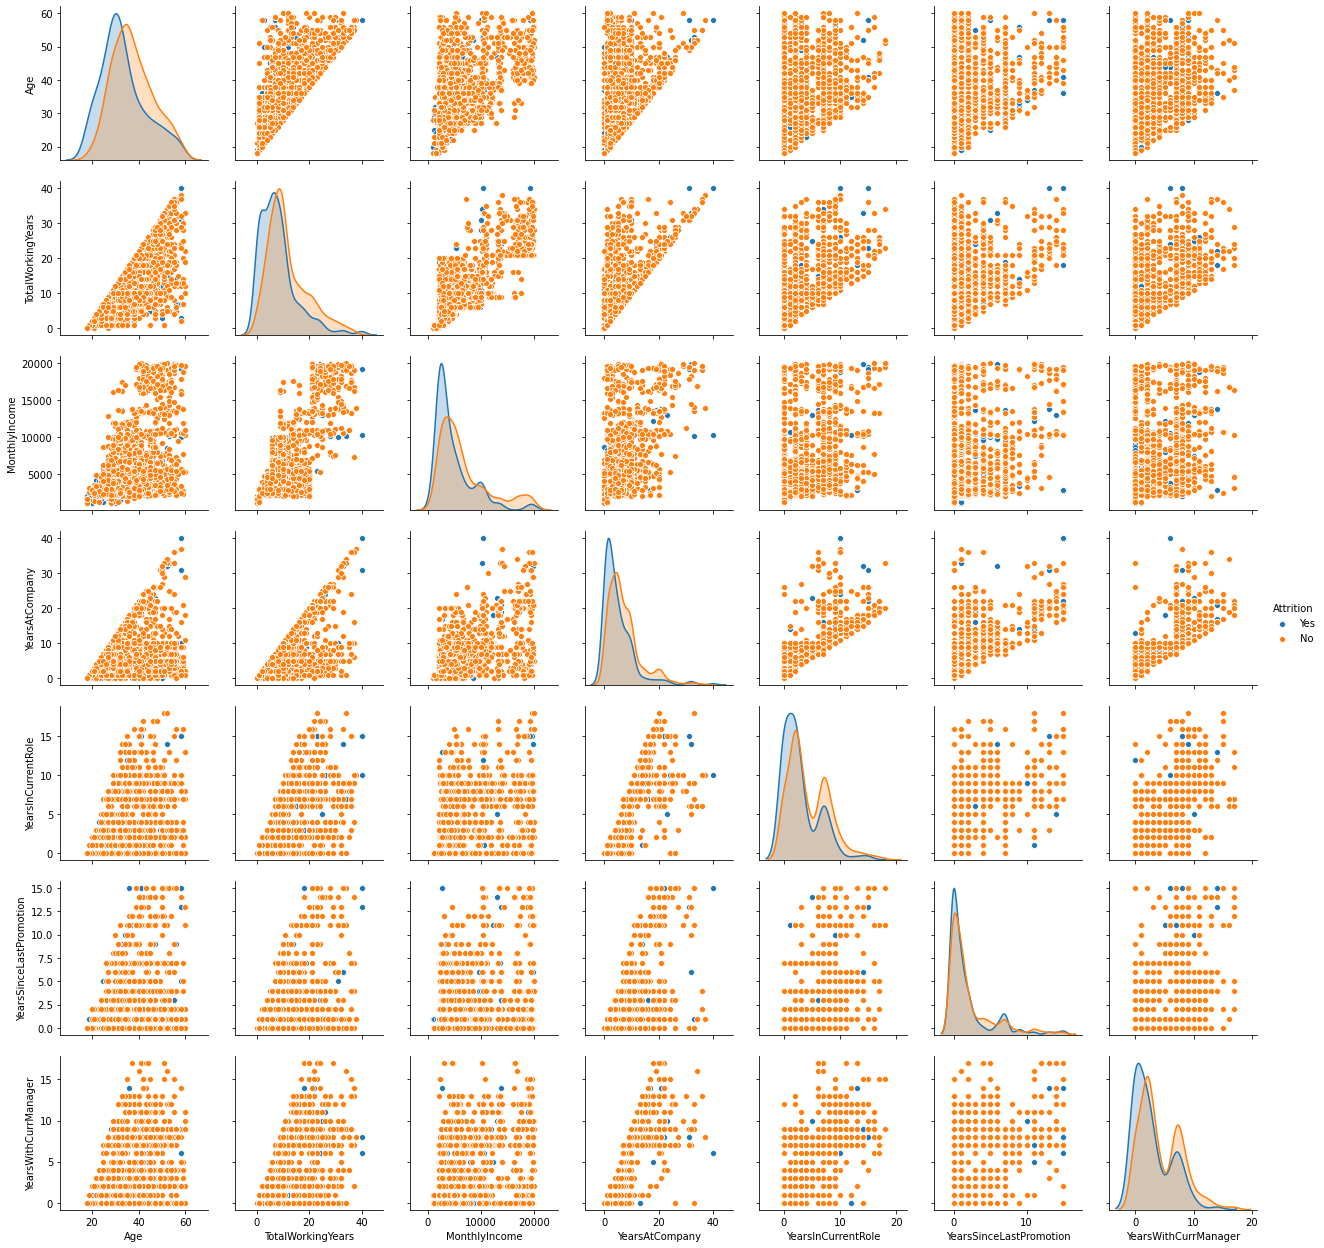

In [33]:
sns.pairplot(df[['Age', 'TotalWorkingYears', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 
                 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition']], hue = 'Attrition')

> We can say that by the amount of data scattered, most of the employee on this categories are not left the company yet. Also we can infer that the older employee age, they tend to work longer, since the scatter of **Age and YearsAtCompany** are somewhat positively scattered. The majority of employee in this company are having a rather significant time working with their current manager, also the longer employee work in a company seems to be influencing their monthly income, we can infer this from the scatter of **TotalWorkingYear, MonthlyIncome, YearsAtCompany, YearsWithCurrManager** and **YearsInCurrentRole**. The rest of the features are pretty much infer the same output.

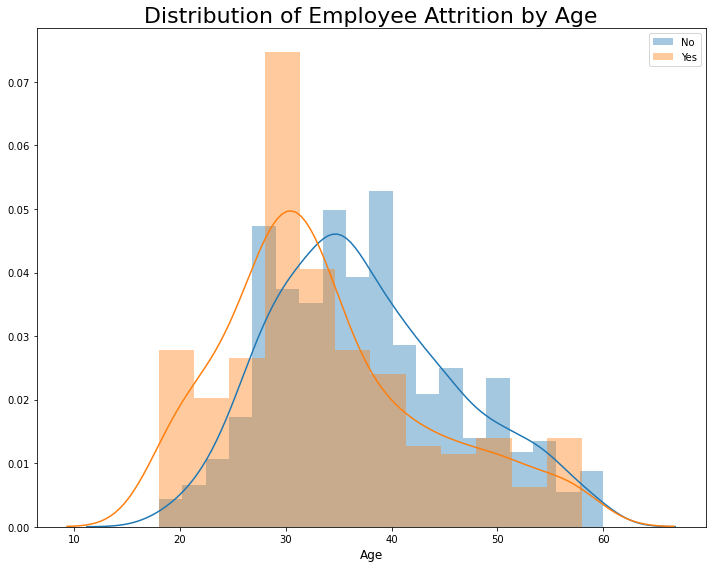

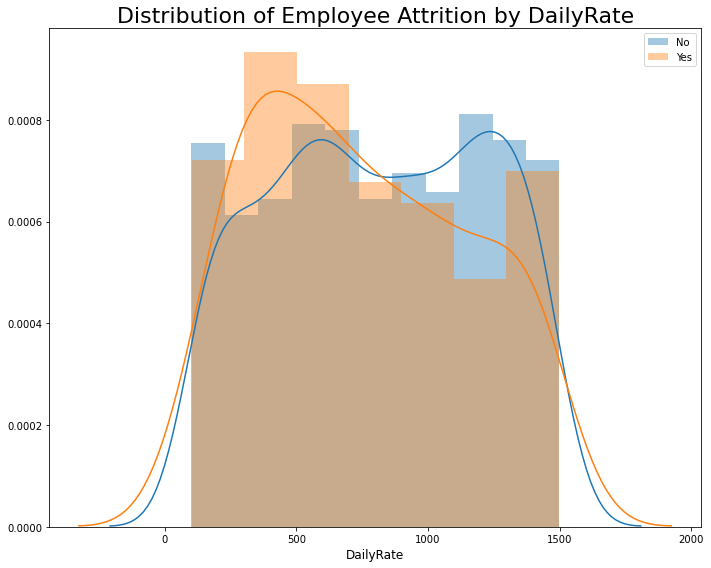

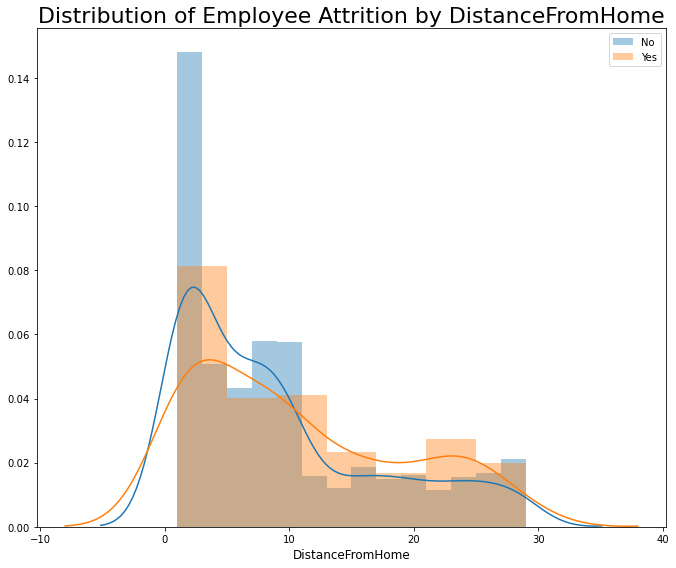

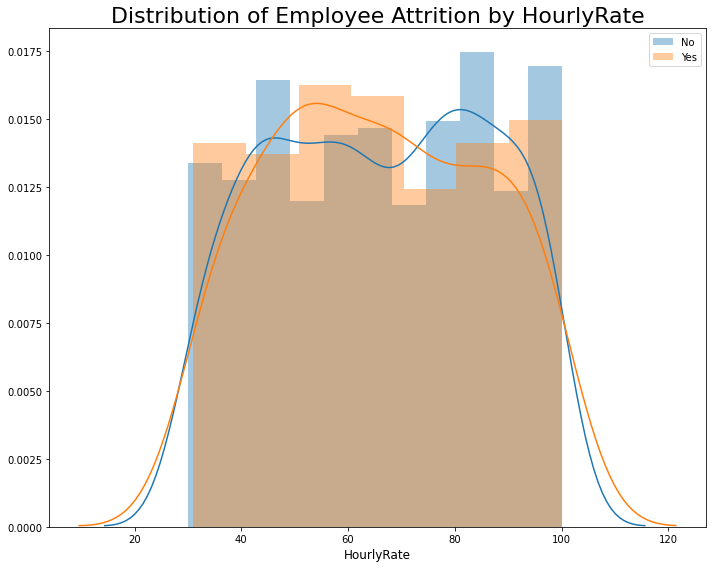

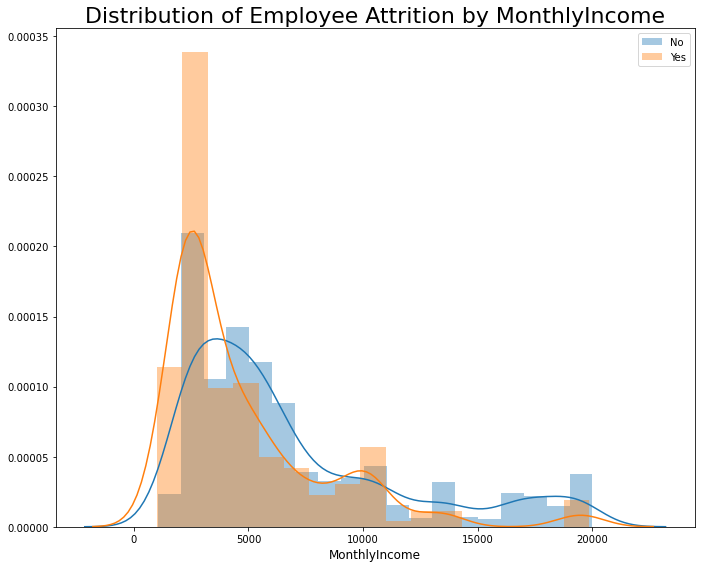

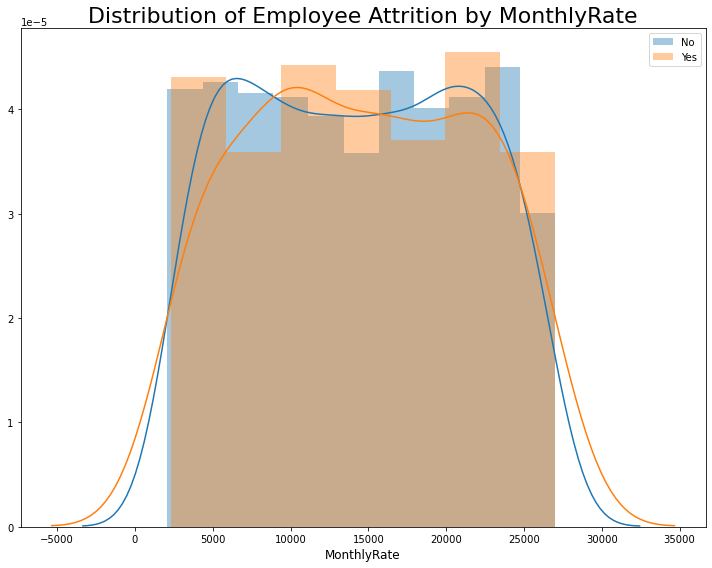

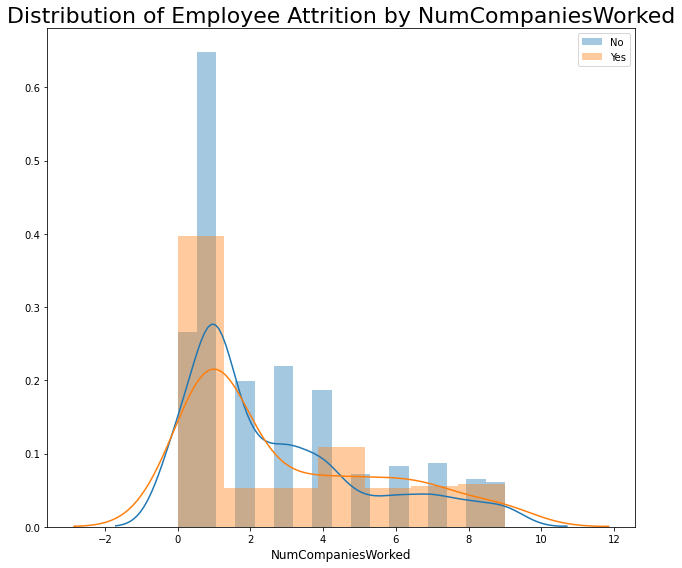

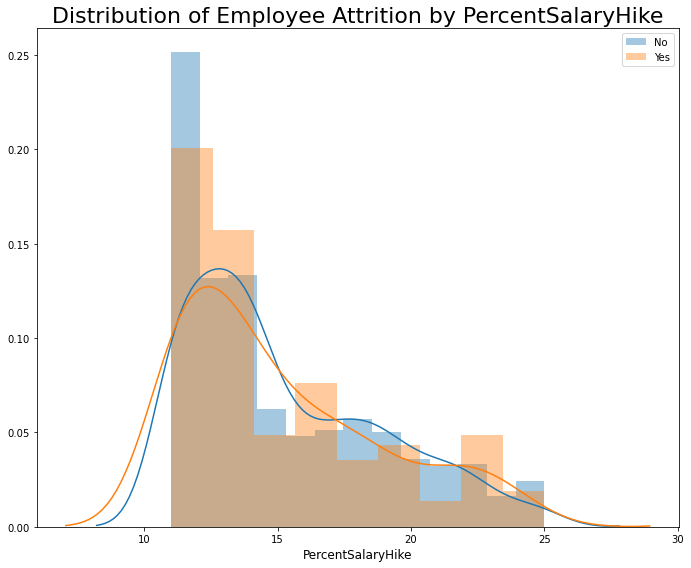

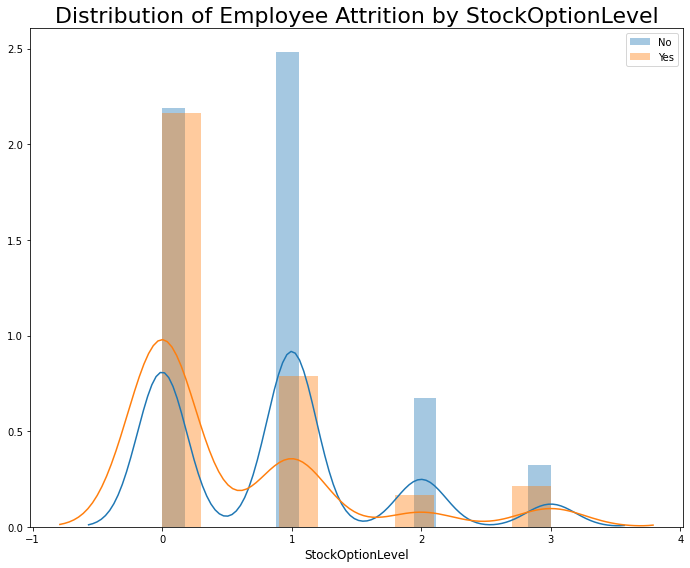

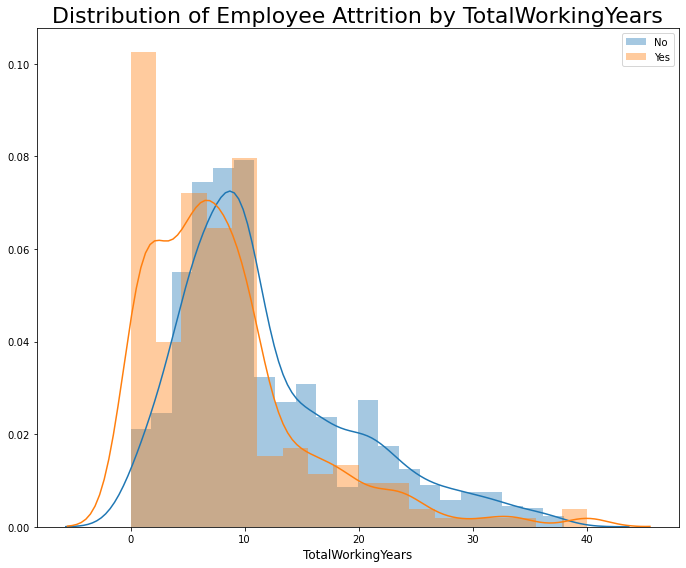

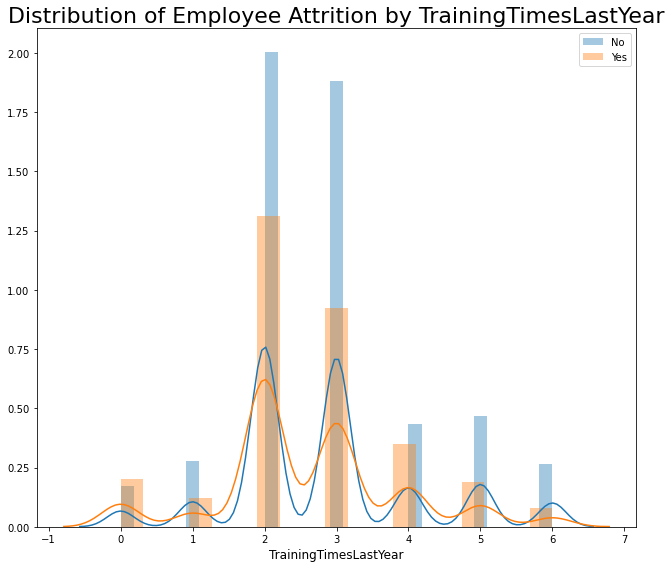

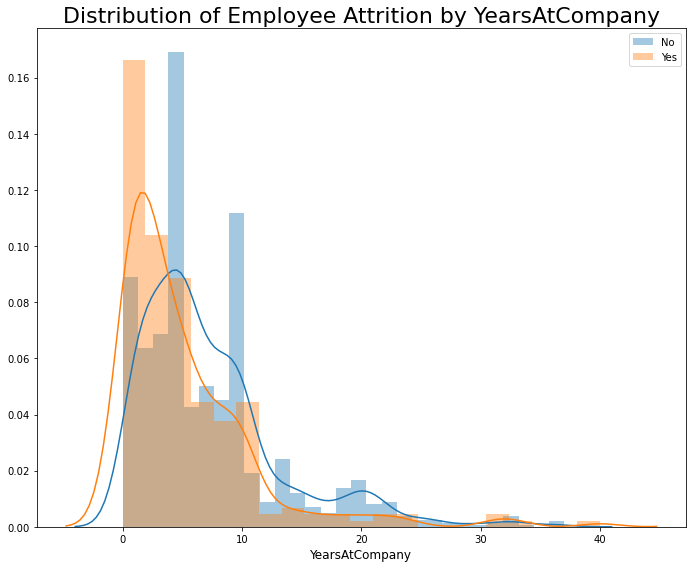

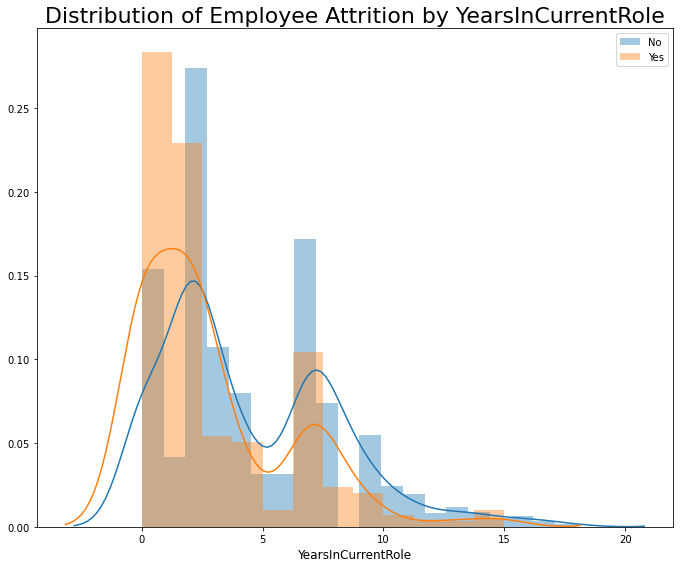

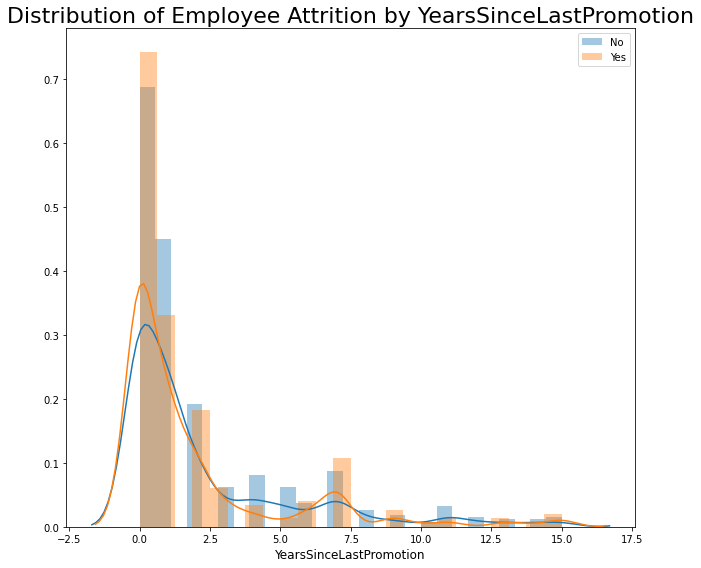

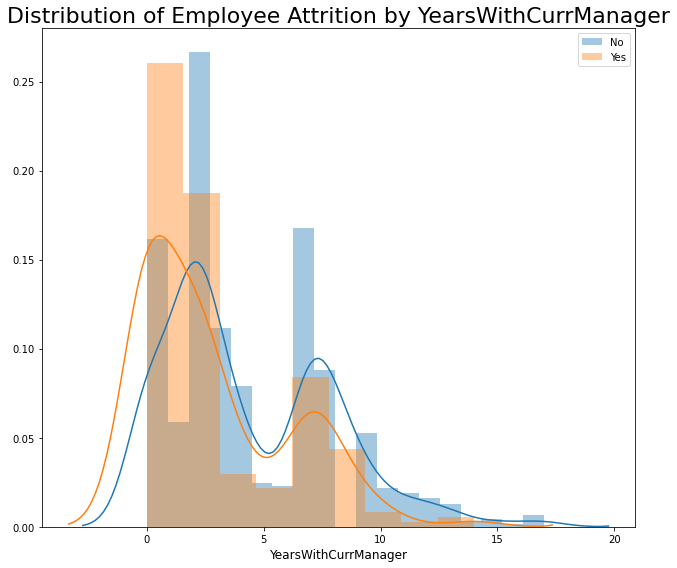

In [34]:
con = df.select_dtypes('int64')

for i in con.columns:
    plt.figure(figsize = (10,8))
    ax = sns.distplot(df[(df['Attrition'] == 'No')][i])
    ax = sns.distplot(df[(df['Attrition'] == 'Yes')][i])
    
    ax.legend(['No', 'Yes'])
    
    plt.xlabel(i, fontsize = 12)
    plt.title('Distribution of Employee Attrition by ' + i, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

> We will not explore all the features one by one. I will be highlighting the feature that are interesting. 
First on **Age** features. We can see from plot above, that mostly the churned employee are around 30 or something years old. I'll further check this, below.

In [35]:
df['Age'][df['Attrition']=='Yes'].value_counts().head()

29    18
31    18
28    14
26    12
33    12
Name: Age, dtype: int64

> By checking it manually, we can get that most of the employees that are churned are somewhat 33 years old or younger, while the employee that are not are from 34 years or older.

In [36]:
df['Age'][df['Attrition']=='No'].value_counts().head()

34    68
35    68
36    63
38    56
40    52
Name: Age, dtype: int64

> On **DailyRate** features, we can see from the distribution plot above that the churned employee daily rate seems to be lower than the not churned.

In [37]:
df['DailyRate'][df['Attrition']=='Yes'].value_counts().head(7)

1162    2
337     2
813     2
1449    2
807     2
1097    2
408     2
Name: DailyRate, dtype: int64

> Although they're not much, but there are churned employee who are also having their daily rate much higher than the not churned one. But if we see the bottom information we can infer that the employees who are not churned are paid almost 700 in minimum. I'll show the 7 highest `value_counts()` to prove this point. 

In [38]:
df['DailyRate'][df['Attrition']=='No'].value_counts().head(7)

691     6
1082    5
829     4
430     4
921     4
977     4
1283    4
Name: DailyRate, dtype: int64

> Next **DistanceFromHome** meaning that the distance between the company that employee worked and their home. From above plot we cannot see the difference. But I'll try to manually check it.

In [39]:
df['DistanceFromHome'][df['Attrition']=='Yes'].value_counts().head()

2     28
1     26
9     18
3     14
24    12
Name: DistanceFromHome, dtype: int64

> Using `value_counts()`. We can manually see the difference between them, the churned employees are mostly having further distances from home than the not churned employee. Well this is understandable. 

In [40]:
df['DistanceFromHome'][df['Attrition']=='No'].value_counts().head()

2     183
1     182
10     75
7      73
3      70
Name: DistanceFromHome, dtype: int64

> On **MonthlyIncome** we can clearly see the difference by seeing the plot alone.

In [41]:
df['MonthlyIncome'][df['Attrition']=='Yes'].value_counts().head()

2293    2
2362    2
2404    2
5346    2
2044    1
Name: MonthlyIncome, dtype: int64

> But counting manually we can see it clearer that most employees churned are the one who got lesser income than the one who does not churned. This is completely understandable as well.

In [42]:
df['MonthlyIncome'][df['Attrition']=='No'].value_counts().head()

5562    3
6347    3
6142    3
2342    3
2559    3
Name: MonthlyIncome, dtype: int64

> On the **MonthlyRate** feature, the pattern is a lot harder to see. 

In [43]:
df['MonthlyRate'][df['Attrition']=='Yes'].value_counts().head()

9150     2
5630     1
17071    1
17102    1
5323     1
Name: MonthlyRate, dtype: int64

> The counts are similar to each other, therefore we can't get the pattern from this feature.

In [44]:
df['MonthlyRate'][df['Attrition']=='No'].value_counts().head()

11737    2
4658     2
23016    2
20364    2
6881     2
Name: MonthlyRate, dtype: int64

> The **NumCompaniesWorked** represents the companies worked by the employee before the current company. From the plot above, it's a little harder to see the pattern, but we can see that the churned employees mostly worked on one or more than 3 companies.

In [45]:
df['NumCompaniesWorked'][df['Attrition']=='Yes'].value_counts().head(7)

1    98
0    23
7    17
4    17
6    16
5    16
3    16
Name: NumCompaniesWorked, dtype: int64

> While the distribution of not churned employee they worked on one, two, three or four companies beforehand.

In [46]:
df['NumCompaniesWorked'][df['Attrition']=='No'].value_counts().head(7)

1    423
0    174
3    143
2    130
4    122
7     57
6     54
Name: NumCompaniesWorked, dtype: int64

> **PercentSalaryHike** of an employee who are churned are mostly 11%.

In [47]:
df['PercentSalaryHike'][df['Attrition']=='Yes'].value_counts().head(7)

11    41
13    34
12    33
14    24
15    18
17    14
16    14
Name: PercentSalaryHike, dtype: int64

> While the not churned mostly on 14% (although it's not by much).

In [48]:
df['PercentSalaryHike'][df['Attrition']=='No'].value_counts().head(7)

14    177
13    175
11    169
12    165
15     83
18     76
17     68
Name: PercentSalaryHike, dtype: int64

> In this **TotalWorkingYears** feature, we can see clearly that the churned employee are mostly only one year working at this company.

In [49]:
df['TotalWorkingYears'][df['Attrition']=='Yes'].value_counts().head()

1     40
10    25
6     22
7     18
5     16
Name: TotalWorkingYears, dtype: int64

> While on the not churned employee are mostly working at least 10 years.

In [50]:
df['TotalWorkingYears'][df['Attrition']=='No'].value_counts().head()

10    177
6     103
8      87
9      86
5      72
Name: TotalWorkingYears, dtype: int64

> I think that's enough exploration in this category. Next we'll explore the categorical features.

### CATEGORICAL FEATURES

> I'll start the process by grouping an object only data type into a new dataframe.

In [51]:
df_cat = df.select_dtypes('object')

In [52]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance,JobLevel
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,College,Medium,High,Very High,Excellent,Low,Bad,Officer
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,Below College,High,Medium,Medium,Outstanding,Very High,Better,Officer
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,College,Very High,Medium,High,Excellent,Medium,Better,Staff
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,Master,Very High,High,High,Excellent,High,Better,Staff
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Below College,Low,High,Medium,Excellent,Very High,Better,Staff


> Then I'll use cramers v to see the correlation in this features, this is nothing but an indicator to explore the data.

In [53]:
# cramers for categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [54]:
corr = []
for i in df_cat:
    matrix = []
    for j in df_cat:
        matrix.append(cramersv(df_cat[i], df_cat[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index = df_cat.columns, columns = df_cat.columns)

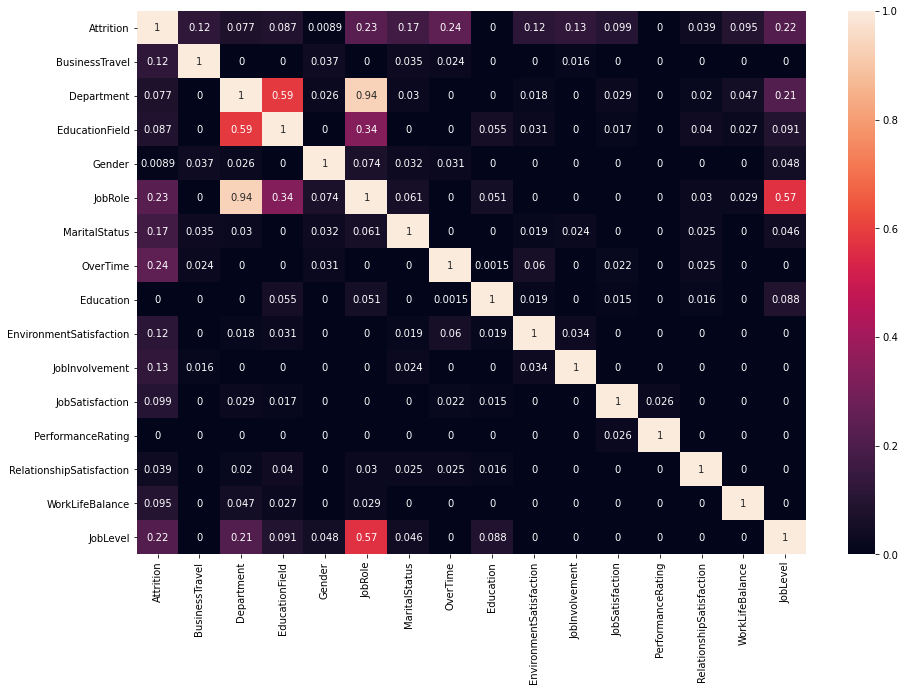

In [55]:
plt.figure(figsize = (15,10))
sns.heatmap(corr_cat, annot = True)
plt.show()

In [56]:
pd.crosstab(df['Department'], df['JobRole'], normalize = True)

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Department,,,,,,,,,
Human Resources,0.000000,0.035374,0.00000,0.007483,0.000000,0.000000,0.000000,0.000000,0.000000
Research & Development,0.089116,0.000000,0.17619,0.036735,0.098639,0.054422,0.198639,0.000000,0.000000
Sales,0.000000,0.000000,0.00000,0.025170,0.000000,0.000000,0.000000,0.221769,0.056463


In [57]:
pd.crosstab(df['Department'], df['EducationField'], normalize = True)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,0.018367,0.010884,0.000000,0.008844,0.002041,0.002721
Research & Development,0.000000,0.299320,0.000000,0.246939,0.043537,0.063946
Sales,0.000000,0.102041,0.108163,0.059864,0.010204,0.023129


In [58]:
pd.crosstab(df['JobRole'], df['JobLevel'], normalize = True)

JobLevel,Assistant Manager,Manager,Officer,Senior Manager,Staff
JobRole,,,,,
Healthcare Representative,0.029932,0.006122,0.053061,0.000000,0.000000
Human Resources,0.004082,0.000000,0.008844,0.000000,0.022449
Laboratory Technician,0.002041,0.000000,0.038095,0.000000,0.136054
Manager,0.008163,0.031973,0.000000,0.029252,0.000000
Manufacturing Director,0.030612,0.006803,0.061224,0.000000,0.000000
Research Director,0.019048,0.017687,0.000000,0.017687,0.000000
Research Scientist,0.000680,0.000000,0.038776,0.000000,0.159184
Sales Executive,0.053741,0.009524,0.158503,0.000000,0.000000
Sales Representative,0.000000,0.000000,0.004762,0.000000,0.051701


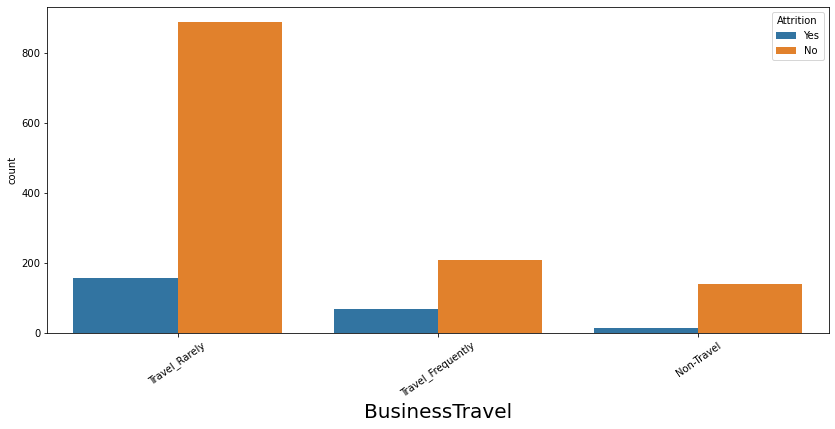

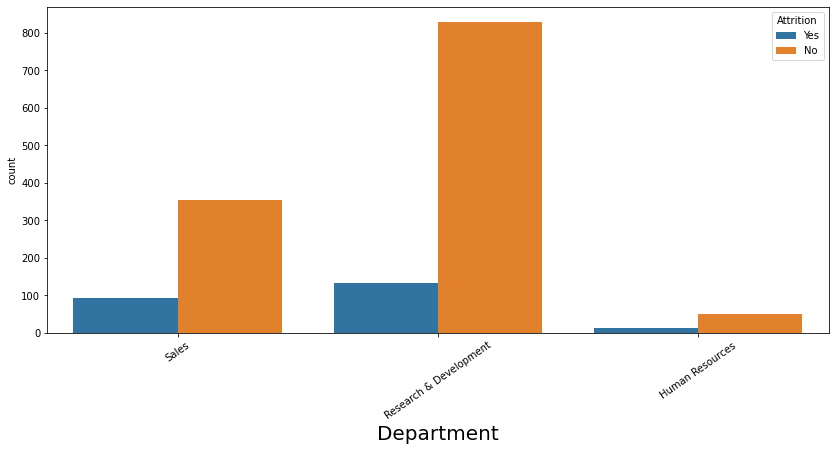

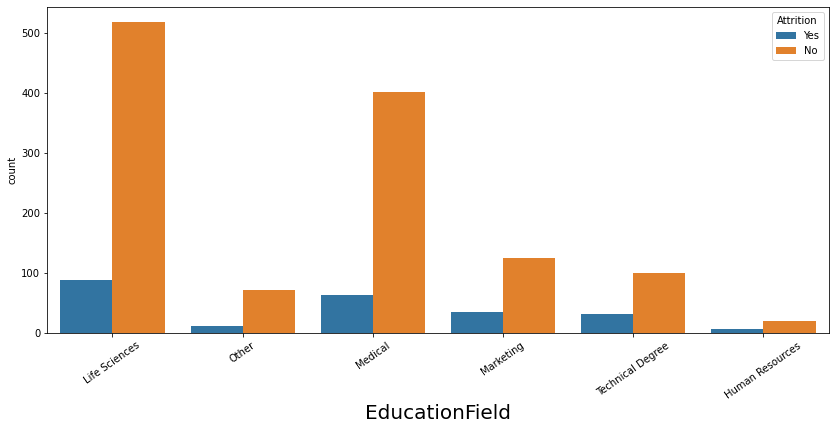

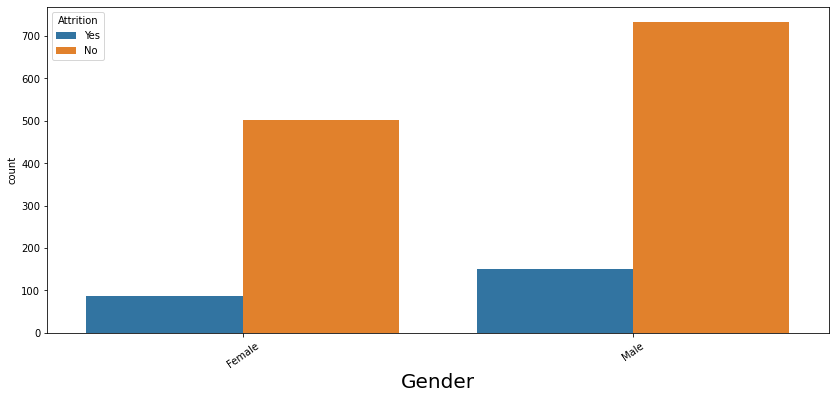

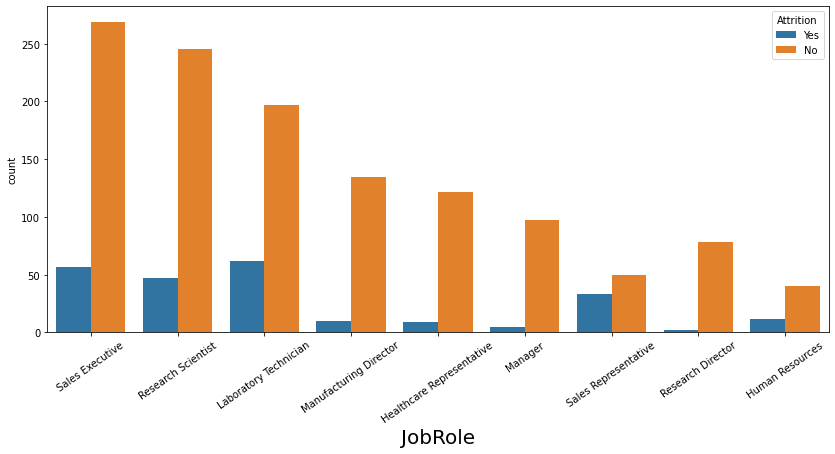

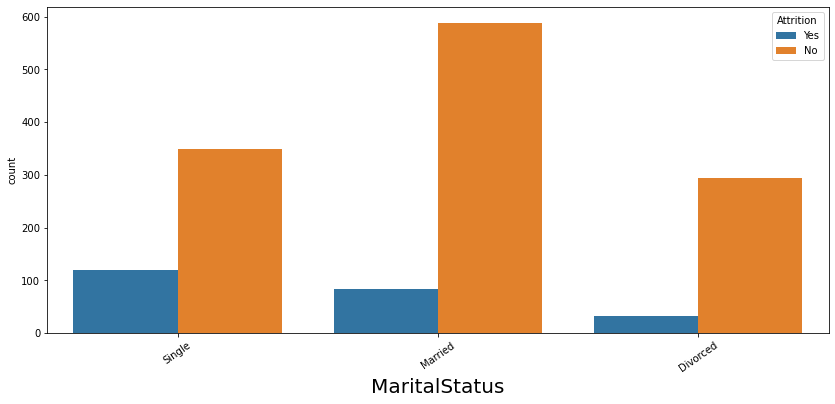

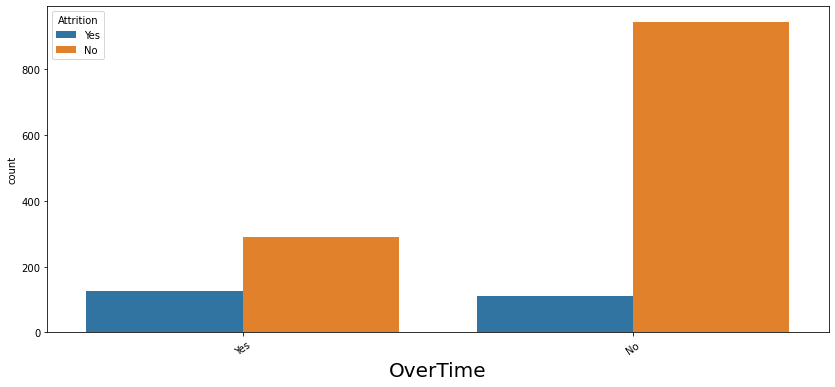

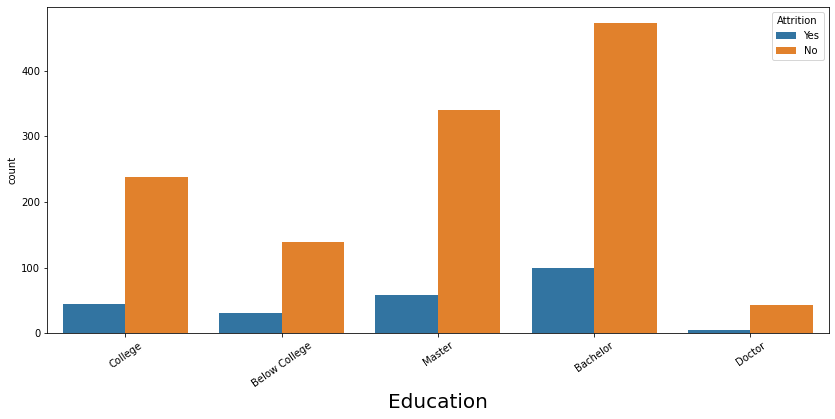

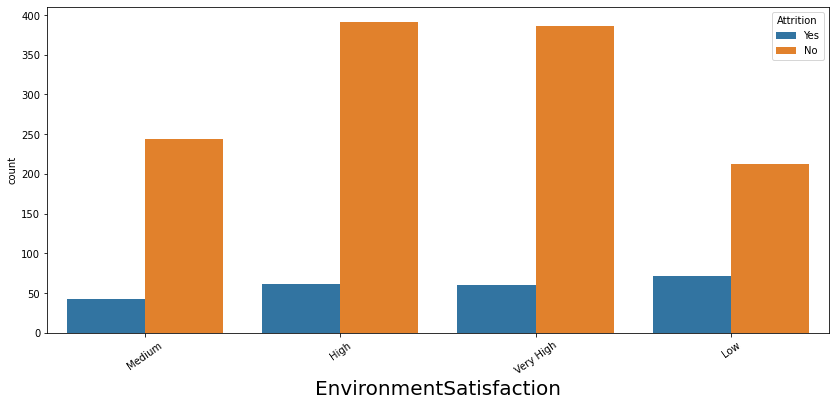

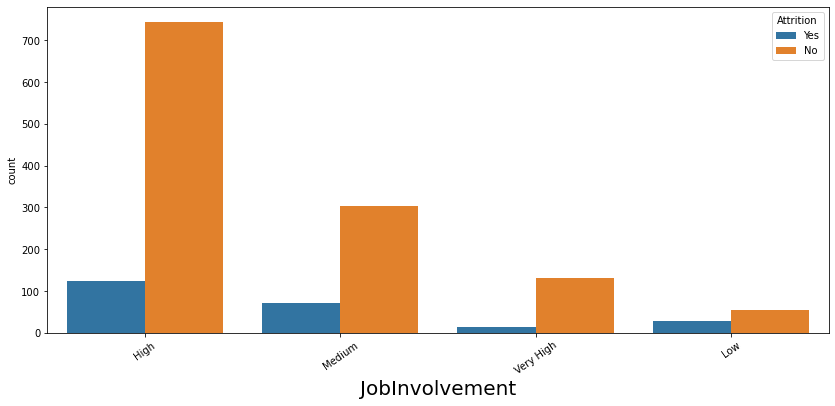

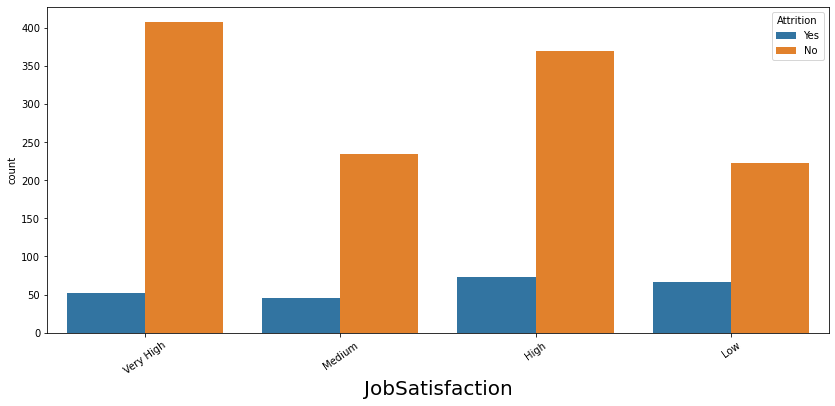

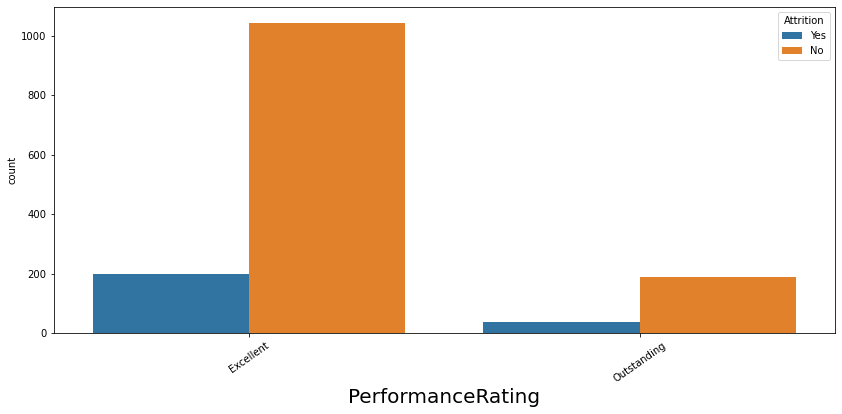

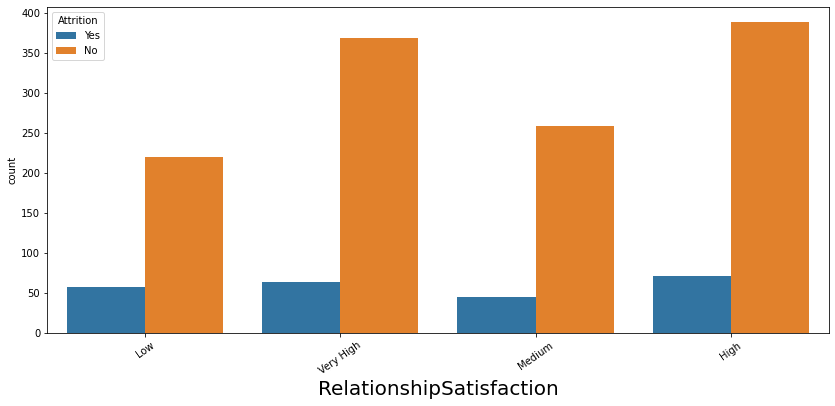

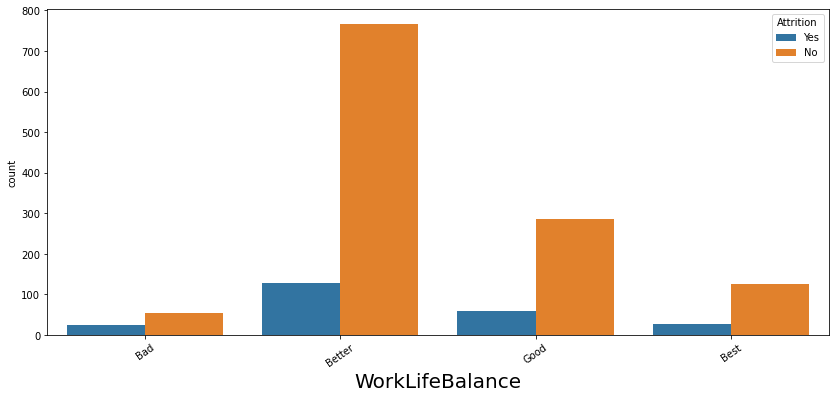

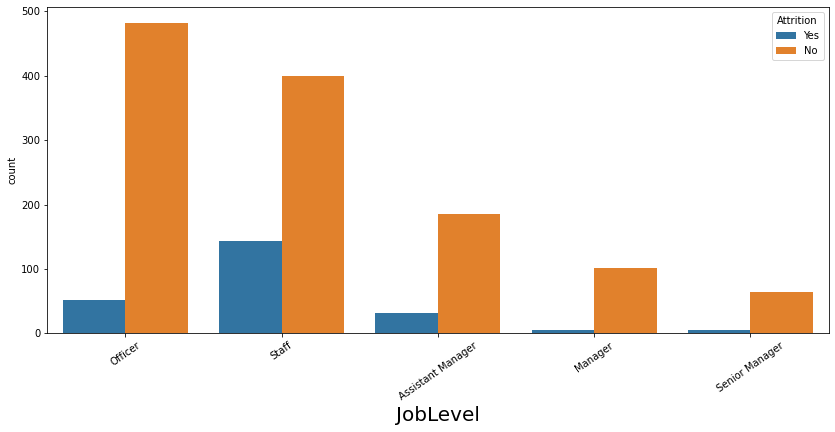

In [59]:
for i in df_cat.drop(columns = 'Attrition'):
    plt.figure(figsize = (14,6))
    ax = sns.countplot(x = i, data = df_cat, hue = 'Attrition')
    plt.xlabel(i, fontsize = 20)
    plt.xticks(rotation=35)
    plt.tight_layout
    plt.show()

> It's a little hard to see the pattern just from the plot alone. As if there is no distinct pattern between the churned and not attrittioned. But with further examination, I'll try to highlight some interesting insight. 

> The employee who are left are mostly from **bachelor degree**, and they are a **staff** who coming from **life sciences**, or **medical** background, they are having **laboratory technician, research scientist** or **sales executive** as their job role. Moreover they also **tend to work overtime, having bad work-life balance**, and also they have **low job satisfaction** as well as **low environment satisfaction**. Which absolutely is understandable.

In [60]:
# Education

df.groupby('Education')['Attrition'].value_counts()

Education      Attrition
Bachelor       No           473
               Yes           99
Below College  No           139
               Yes           31
College        No           238
               Yes           44
Doctor         No            43
               Yes            5
Master         No           340
               Yes           58
Name: Attrition, dtype: int64

In [61]:
# JobLevel

df.groupby('JobLevel')['Attrition'].value_counts()

JobLevel           Attrition
Assistant Manager  No           186
                   Yes           32
Manager            No           101
                   Yes            5
Officer            No           482
                   Yes           52
Senior Manager     No            64
                   Yes            5
Staff              No           400
                   Yes          143
Name: Attrition, dtype: int64

In [62]:
# EducationField

df.groupby('EducationField')['Attrition'].value_counts()

EducationField    Attrition
Human Resources   No            20
                  Yes            7
Life Sciences     No           517
                  Yes           89
Marketing         No           124
                  Yes           35
Medical           No           401
                  Yes           63
Other             No            71
                  Yes           11
Technical Degree  No           100
                  Yes           32
Name: Attrition, dtype: int64

In [63]:
# JobRole

df.groupby('JobRole')['Attrition'].value_counts()

JobRole                    Attrition
Healthcare Representative  No           122
                           Yes            9
Human Resources            No            40
                           Yes           12
Laboratory Technician      No           197
                           Yes           62
Manager                    No            97
                           Yes            5
Manufacturing Director     No           135
                           Yes           10
Research Director          No            78
                           Yes            2
Research Scientist         No           245
                           Yes           47
Sales Executive            No           269
                           Yes           57
Sales Representative       No            50
                           Yes           33
Name: Attrition, dtype: int64

## SUMMARY

> In summary, from the scatter of **Age and YearsAtCompany**, we can infer that the older employee age, they seems tend to work longer at the said company. Also majority of employee in this company are having a rather significant time working with their current manager, also the longer employee work in a company seems to be influencing their monthly income, we can infer this from the scatter of **TotalWorkingYear, MonthlyIncome, YearsAtCompany, YearsWithCurrManager** and **YearsInCurrentRole**. 

> There are 16% of total employee churned. The churned are mostly from **bachelor degree**, and they are a **staff** who coming from **life sciences**, or **medical** background, they are having **laboratory technician, research scientist** or **sales executive** as their job role. Moreover they also **tend to work overtime, having bad work-life balance**, and also they have **low job satisfaction** as well as **low environment satisfaction**.

> That being said, I'll drop the cleaned data to another csv using .to_csv() so that we can use the cleaned data for Machine Learning purpose.

In [64]:
df.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,College,Medium,...,19479,8,11,0,8,0,6,4,0,5
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,Below College,High,...,24907,1,23,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,College,Very High,...,2396,6,15,0,7,3,0,0,0,0
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,Master,Very High,...,23159,1,11,0,8,3,8,7,3,0
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,Below College,Low,...,16632,9,12,1,6,3,2,2,2,2


In [65]:
df.to_csv('attrition_ready.csv', index = False)